In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox

%matplotlib inline
ox.config(log_console=True)
ox.__version__

'1.1.0'

# I/ Map

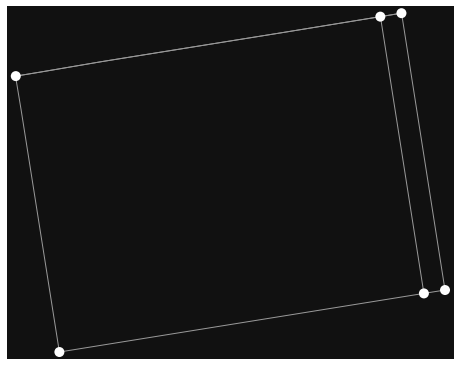

In [2]:
# define a point at the corner of California St and Mason St in SF
location_point = (37.791427, -122.410018)

# create network from point, inside bounding box of N, S, E, W each 100m from point
MDG = ox.graph_from_point(location_point, dist=100, dist_type="bbox", network_type="drive")
fig, ax = ox.plot_graph(MDG, node_color="white", node_size=100)

## A) Graph pre-processing

- [ ] Build regular graph representation from Osmnx graph.
    - Convert osmnx node id to intgers
    - Transform to MultiGraph
- [ ] Make graph eulerian (Chinese postman)

In [3]:
MDG = nx.convert_node_labels_to_integers(MDG) # Use label to deal with node id 
MG = ox.utils_graph.get_undirected(MDG) # MultiDiGraph -> MultiGraph

In [43]:
class RegGraph:
    """
        Build regular graph representation from Osmnx graph.
    """
    
    def __init__(self, G):
        self.G = G
        self.adjlist = self.create_adjlist(self.G)
        self.adjmat = self.adjlist_to_adjmat(self.adjlist)
        
    def create_adjlist(self, G):
        adjlist = []
        for src, nbrdict in self.G.adjacency():
            tmp = []
            for dst in nbrdict:
                length = ox.utils_graph.get_route_edge_attributes(G, (src, dst), 'length')[0]
                tmp.append((dst, length))
            adjlist.append((src, tmp))
        return dict(adjlist)
        

    def adjlist_to_adjmat(self, adjlist):
        n = len(self.adjlist)
        adjmat = [[0 for j in range(n)] for i in range(n)]
        for src in range(n):
            for dst, length in self.adjlist[src]:
                adjmat[src][dst] = length
        return adjmat

    def pretty_print_adjmat(self):
        n = len(self.adjmat)

        print("  ",end="")
        for i in range(n):
            print("{} ".format(i), end="")

        print()

        for i in range(n):
            print("{} ".format(i), end="")
            for j in range(n):
                print(self.adjmat[i][j], end="|")
            print()

In [44]:
graph = RegGraph(MG)
print(graph.adjlist)
print("----")
graph.pretty_print_adjmat()

{0: [(1, 107.41299999999998), (3, 142.02499999999998)], 1: [(0, 107.41299999999998), (2, 141.957)], 2: [(1, 141.957), (3, 107.72500000000001), (5, 8.222999999999999)], 3: [(0, 142.02499999999998), (4, 8.228), (2, 107.72500000000001)], 4: [(3, 8.228), (5, 107.75699999999999)], 5: [(2, 8.222999999999999), (4, 107.75699999999999)]}
----
  0 1 2 3 4 5 
0 0|107.41299999999998|0|142.02499999999998|0|0|
1 107.41299999999998|0|141.957|0|0|0|
2 0|141.957|0|107.72500000000001|0|8.222999999999999|
3 142.02499999999998|0|107.72500000000001|0|8.228|0|
4 0|0|0|8.228|0|107.75699999999999|
5 0|0|8.222999999999999|0|107.75699999999999|0|


## B) Graph traversal

- [ ] `find_eulerian_circuit()`

In [45]:
def find_eulerian_circuit_aux(circuit, adjmat, start):
    for i in range(len(adjmat)):
        if adjmat[start][i] > 0:
            adjmat[start][i] = 0
            adjmat[i][start] = 0
            find_eulerian_circuit_aux(circuit, adjmat, i)
    circuit.append(start)
    return circuit

def find_eulerian_circuit(adjmat, start):
    circuit = []
    return find_eulerian_circuit_aux(circuit, adjmat, start)
        
circuit = find_eulerian_circuit(graph.adjmat, 3)
print(circuit[::-1])

[3, 0, 1, 2, 3, 4, 5, 2]


# II/ Benchmark

# III/ Vizualisation